In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/dataset.csv')
data

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025.0,47.2917,-122.3658,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025.0,47.6531,-122.1996,74.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025.0,47.4733,-122.1901,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,K
3,3,1999-12-15,267000,1.0,,nochg,2025.0,47.4739,-122.3295,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025.0,47.7516,-122.1222,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,10989,2011-07-15,293000,2.0,,new,2025.0,47.2809,-122.3573,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I
10990,10990,2016-09-15,291000,NaN,,nochg,2025.0,47.4331,-122.2767,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,J
10991,10991,2003-08-15,379000,NaN,,nochg,2025.0,47.6015,-122.1954,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S
10992,10992,2022-12-15,1115500,5.0,,new,2025.0,47.3431,-122.0329,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10994 non-null  int64  
 1   sale_date         10994 non-null  object 
 2   sale_price        10994 non-null  int64  
 3   sale_nbr          8645 non-null   float64
 4   sale_warning      10994 non-null  object 
 5   join_status       10993 non-null  object 
 6   join_year         10993 non-null  float64
 7   latitude          10993 non-null  float64
 8   longitude         10993 non-null  float64
 9   area              10993 non-null  float64
 10  city              10993 non-null  object 
 11  zoning            10993 non-null  object 
 12  subdivision       10020 non-null  object 
 13  present_use       10993 non-null  float64
 14  land_val          10993 non-null  float64
 15  imp_val           10993 non-null  float64
 16  year_built        10993 non-null  float6

Simple Data Preprocessing

In [ ]:
data.isna().sum()

,0
id,0
sale_date,0
sale_price,0
sale_nbr,2349
sale_warning,0
join_status,1
join_year,1
latitude,1
longitude,1
area,1


In [ ]:
data['sale_nbr'].fillna('Missing',inplace=True)
data['sale_nbr']= data['sale_nbr'].astype('category')
data['sale_date'] = pd.to_datetime(data['sale_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10994 non-null  int64         
 1   sale_date         10994 non-null  datetime64[ns]
 2   sale_price        10994 non-null  int64         
 3   sale_nbr          10994 non-null  category      
 4   sale_warning      10994 non-null  object        
 5   join_status       10993 non-null  object        
 6   join_year         10993 non-null  float64       
 7   latitude          10993 non-null  float64       
 8   longitude         10993 non-null  float64       
 9   area              10993 non-null  float64       
 10  city              10993 non-null  object        
 11  zoning            10993 non-null  object        
 12  subdivision       10020 non-null  object        
 13  present_use       10993 non-null  float64       
 14  land_val          1099

/tmp/ipython-input-14-507443312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sale_nbr'].fillna('Missing',inplace=True)
/tmp/ipython-input-14-507443312.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['sale_nbr'].fillna('Missing',inplace=True)


calculating average sale price by sale number to see if there is any correlation

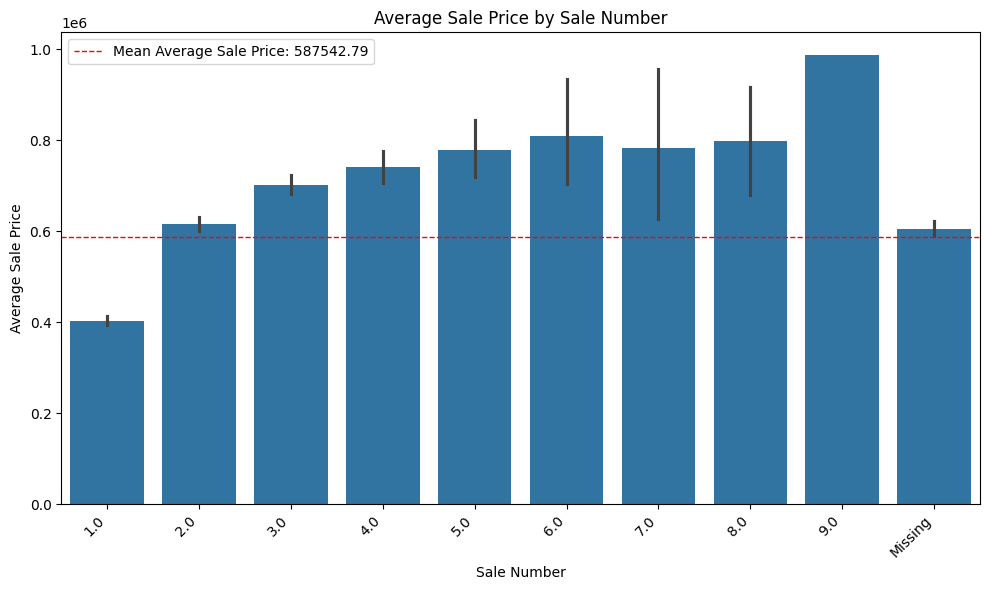

'\nThis graph shows that the na values that were filled with missing have a mean sale price very close to to others\nindicating that could be of key analysis value and check why they were missing the first place.\n'

In [ ]:

mean_average_sale_price = data['sale_price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x='sale_nbr', y='sale_price', data=data)
plt.axhline(mean_average_sale_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean Average Sale Price: {mean_average_sale_price:.2f}')
plt.legend()
plt.xlabel('Sale Number')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Sale Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
'''
This graph shows that the na values that were filled with missing have a mean sale price very close to to others
indicating that could be of key analysis value and check why they were missing the first place.
'''

Number of houses bought according to listing age

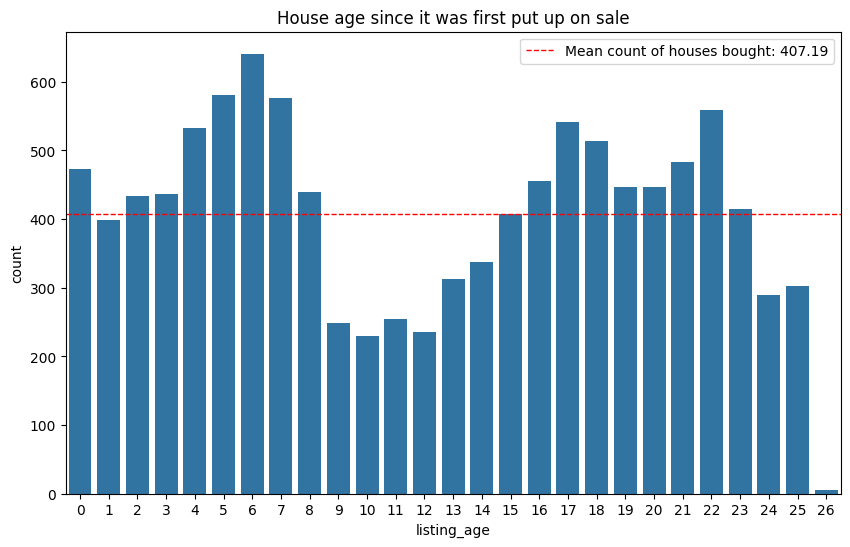

In [ ]:
#listing age is the age of house since it was first listed for sale
#not to be confused with the acutal house age which is when the house was actually built
#------------------------------------
first_sale_year = data['sale_date'].dt.year.min()
data['listing_age'] = (data['sale_date'].dt.year - first_sale_year)
#-------------------------------------
listing_ages=data['listing_age'].value_counts().index
listing_count=data['listing_age'].value_counts().values
years_count_mean=data['listing_age'].value_counts().values.mean()
#years_count_mean get the mean count of of the number of times a house has been bought according to listing age
#-------------------------------------
plt.figure(figsize=(10,6))
plt.ylabel('count')
sns.barplot(x=listing_ages,y=listing_count)
plt.axhline(years_count_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean count of houses bought: {years_count_mean:.2f}')
plt.legend()
plt.title('House age since it was first put up on sale')
plt.show()

Creating two datframes one that contains no outliers the other one does

In [ ]:
mean_sale_price = data['sale_price'].mean()
upper_bound = mean_sale_price + (3 * data['sale_price'].std())
lower_bound = mean_sale_price - (3 * data['sale_price'].std())
outliers = data[data['sale_price']>= upper_bound]
no_outliers = data[data['sale_price']<= upper_bound]
#no lower bound becuase lower bound is in the negative and there is no house that is being sold

The average sale price by listing age

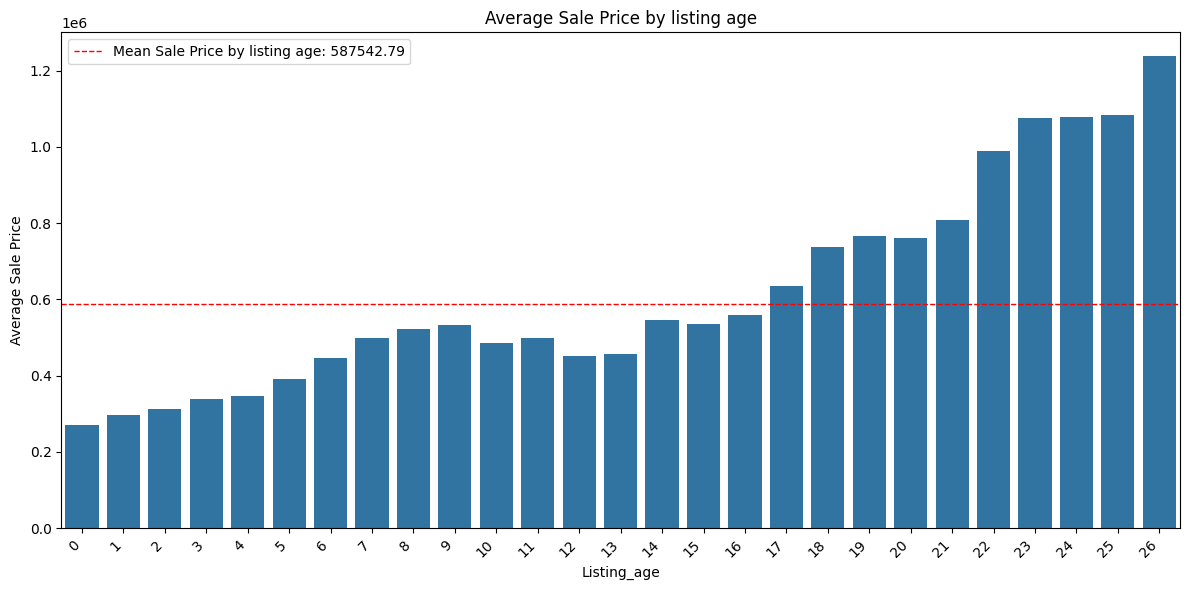

In [ ]:

listing_average_sale_price = data.groupby('listing_age')['sale_price'].mean().reset_index()
mean_sale_price = data['sale_price'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='listing_age', y='sale_price', data=listing_average_sale_price)
plt.axhline(mean_average_sale_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean Sale Price by listing age: {mean_sale_price:.2f}')
plt.legend()
plt.xlabel('Listing_age')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by listing age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


this shows graph and the previous one shows two things:
1- is that as the age of the house since listing increases so does the average sale price:
    this could be the cause of few things such as the number of beds with the knowledge that old houses
    used to be bigger and contained more beds and wider layouts.
2- secondly noticing tha most people bought houses that are between the ages 4-7 and 16-23:
    -the primary hypothesis is that as the house gets older its price increases which sometimes makes it harder to sell
    especially if its not in the city so the real-estate agency could lower it price to increase sales.

The number of houses that were bought with an outlier of a price and the number of  bedrooms in each house

<Axes: xlabel='beds', ylabel='count'>

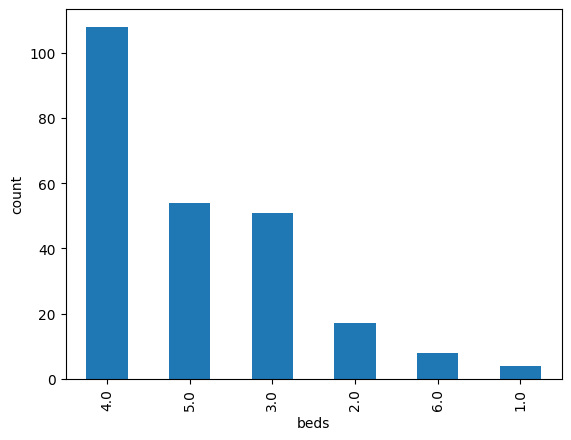

In [ ]:
plt.ylabel('count')
outliers['beds'].value_counts().plot(kind='bar')

The number of houses that were bought with an normal price and the number of  bedrooms in each house

<Axes: xlabel='beds', ylabel='count'>

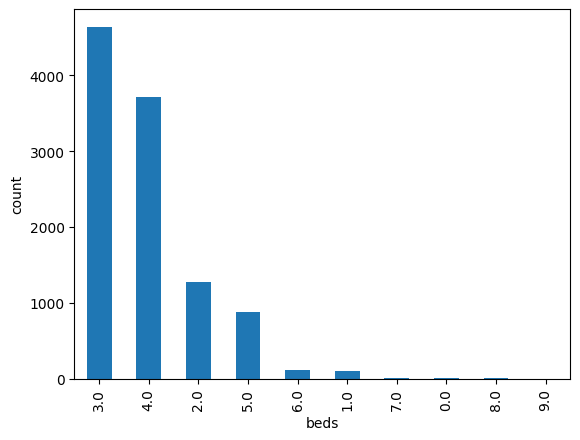

In [ ]:
data = data[data['beds'] != 13]
no_o = data[(data['sale_price']<upper_bound)]
plt.ylabel(ylabel='count')
no_o['beds'].value_counts().plot(kind='bar')

The previous graphs shows us that most people want a house between 3-5 bedrooms these could be for multiple of reasons including:
  -having no need many bedrooms as the people living there dont or dont plan on having many children
  -the ease of cleaning because as the number of bedrooms increase in the house so does the job of cleaning them which may require a hosue cleaner.

--------------------------------------------------------------------

This shows the number of houses bought in each city  where these houses had an outlier of sale price

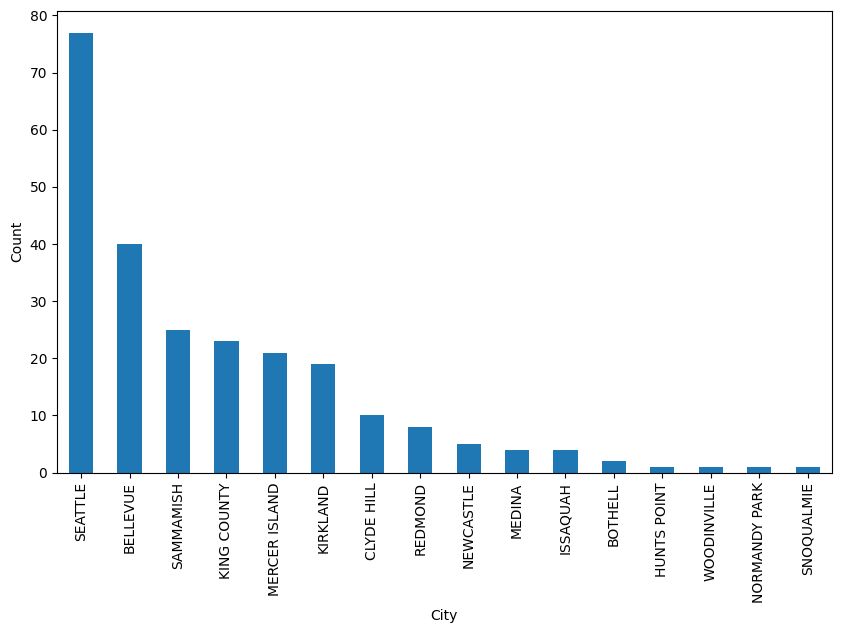

In [ ]:

plt.figure(figsize=(10,6))
outliers['city'].value_counts().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()
#this shows that seattle and bellevue had the most houses sold with high prices

This shows the number of houses bought in each city with a below outlier price

<Axes: xlabel='city'>

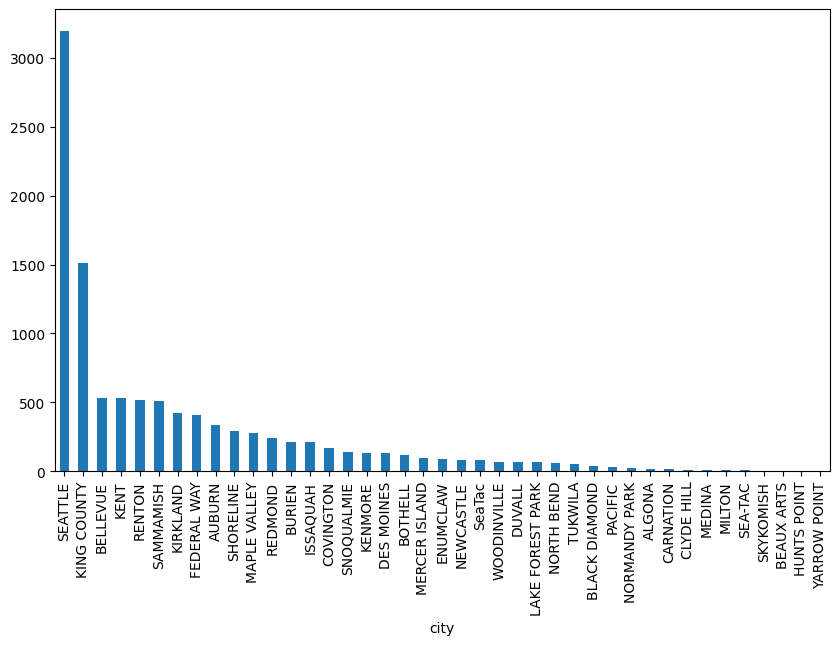

In [ ]:

plt.figure(figsize=(10,6))
no_outliers['city'].value_counts().plot(kind='bar')
#showing that seattle still reigns supreme


-The last two graphs tells firstly that seattle has houses that have above average prices
but mostly in fall in the average range same goes for bellevue staying the top 3 in the average range

-This could be because its the biggest city in washington state containing suburban areas as well as low income areas


--------------------------------------------------------

The previous 2 graphs were done on the number of houses bought so does this correlate with the average house in said cities?

--------------------------------------------------------------------------------

This plot uses the whole data including the outliers for average sale price of a house per city

<Axes: xlabel='city'>

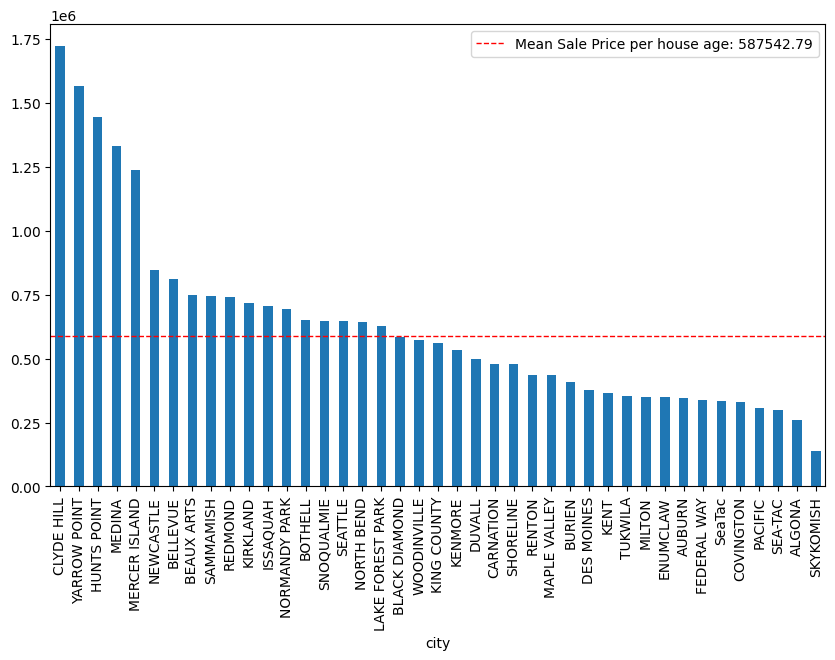

In [ ]:

plt.figure(figsize=(10,6))
plt.axhline(data['sale_price'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean Sale Price per house age: {mean_sale_price:.2f}')
plt.legend()
data.groupby('city')['sale_price'].mean().sort_values(ascending=False).plot(kind='bar')

this data doesnt include outliers for average sale price of a house per city

<Axes: xlabel='city'>

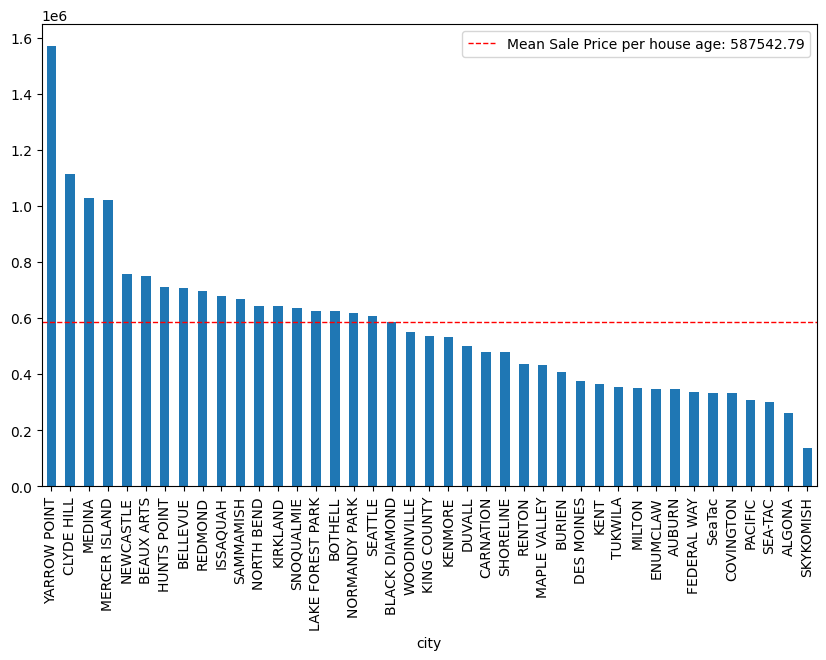

In [ ]:
plt.figure(figsize=(10,6))
plt.axhline(data['sale_price'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean Sale Price per house age: {mean_sale_price:.2f}')
plt.legend()
no_outliers.groupby('city')['sale_price'].mean().sort_values(ascending=False).plot(kind='bar')

what can be deduced from the data:
  - most people live in very populated areas for their below average sale price or other social reasons
  -places like yarrow point adn clyde hill always had above average sale prices for their homes this included both the whole data and the data that only contained outliers.
  -after research this is because these two cities are known for their beautiful views and beach/dock views as well as wide house layouts increasing its housing price

-------------------------------------------------------------------------------

More data preprocessing

In [ ]:
data['submarket'].fillna('Missing',inplace=True)
data['submarket']= data['submarket'].astype('category')
data.value_counts('submarket')

/tmp/ipython-input-34-2007965759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['submarket'].fillna('Missing',inplace=True)


,count
submarket,
K,1145
B,886
I,833
R,813
Q,740
F,708
O,699
D,664
L,583


<Axes: ylabel='count'>

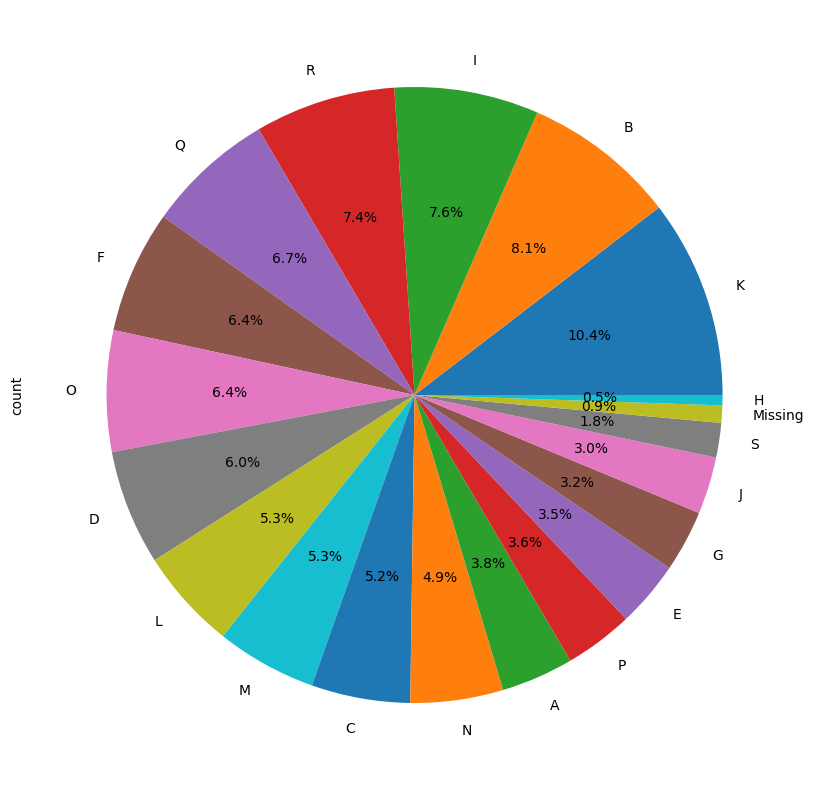

In [ ]:
plt.figure(figsize=(10,10))
data.value_counts('submarket').plot(kind='pie', autopct='%1.1f%%')

Knowing that K has the most amount in accordance to the rest of the market.

In [ ]:
data.groupby('submarket')['sale_price'].mean().sort_values(ascending=False)

/tmp/ipython-input-40-2828638686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('submarket')['sale_price'].mean().sort_values(ascending=False)


,sale_price
submarket,
S,1.245329e+06
Missing,8.971213e+05
D,8.642812e+05
P,7.784209e+05
R,7.731198e+05
O,7.487934e+05
Q,6.688565e+05
C,6.645714e+05
B,6.194308e+05


In [ ]:
data.groupby('submarket')['sqft'].mean().sort_values(ascending=False)

/tmp/ipython-input-41-3094487805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('submarket')['sqft'].mean().sort_values(ascending=False)


,sqft
submarket,
S,2998.417085
O,2774.690987
Missing,2704.929293
P,2667.671717
R,2582.975400
N,2329.110280
Q,2238.400000
K,2140.320524
M,2116.434483


The first deduction would be that there is a collrelation between sale price of a house and the square foot in the house:
- but that dedcution is broken when the Submarket O betcome the second one in the list
-this could mean that there is a slight correlation at best between them

<Axes: >

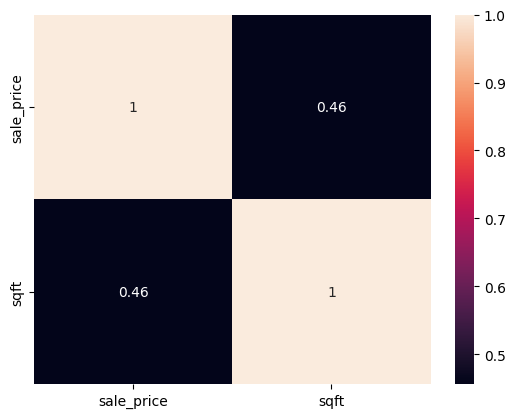

In [ ]:
corr = data[['sale_price','sqft']].corr()
sns.heatmap(corr, annot=True)

this confirms our deduction that their is a slight correlation but not enough to be used in real life decisions.

---------------------------------------------------------------------

This confirms our previous deduction of that most people want 3-5 beds. showing even in the submarkets the numbers of beds is the same

In [ ]:
data.groupby('submarket')['beds'].mean()

/tmp/ipython-input-27-2904431430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('submarket')['beds'].mean()


,beds
submarket,
A,3.468900
B,2.966140
C,3.333333
D,3.219880
E,3.113158
F,3.018362
G,3.297753
H,2.728814
I,3.470588


There appears there is no big correlation between submarkets and square foot in a house which may indicate that there is no big correlation between squarefoot in a house and sale_price


<Axes: xlabel='submarket', ylabel='sale_price'>

<Figure size 1000x600 with 0 Axes>

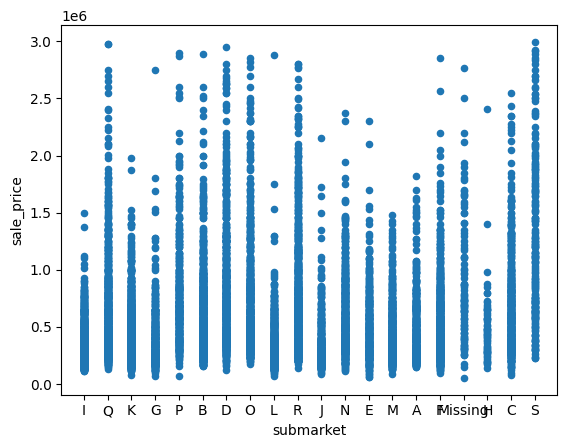

In [ ]:

data.replace(0,'Missing',inplace=True)
plt.figure(figsize=(10,6))
data[['sale_price','submarket']].plot(kind='scatter',x='submarket',y='sale_price')

<Axes: xlabel='condition'>

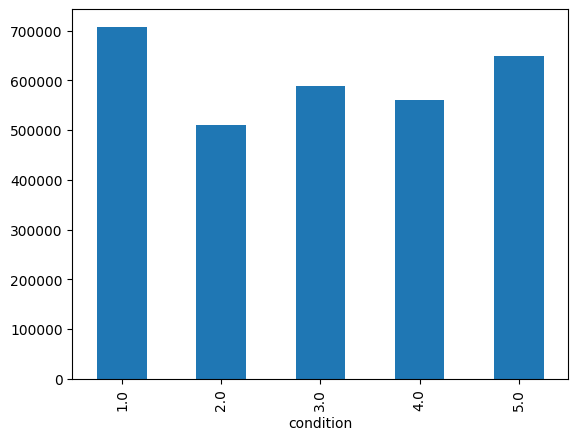

In [ ]:
data.groupby('condition')['sale_price'].mean().plot(kind='bar')

This shows that the the sale prices has only increased as the years go by.

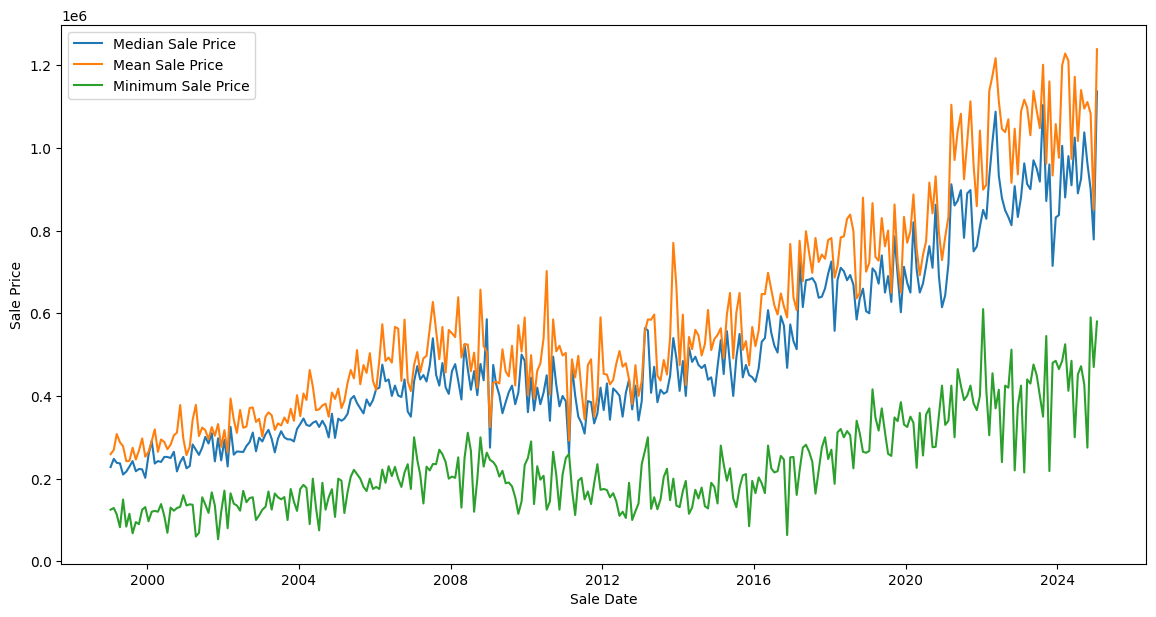

In [42]:
daily_sale_stats = data.groupby('sale_date')['sale_price'].agg(['median', 'mean', 'min', 'max']).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sale_stats, x='sale_date', y='median', label='Median Sale Price')
sns.lineplot(data=daily_sale_stats, x='sale_date', y='mean', label='Mean Sale Price')
sns.lineplot(data=daily_sale_stats, x='sale_date', y='min', label='Minimum Sale Price')
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.legend()
plt.show()